Q) Choose a two variable problem from OT Textbook or any other site.

Plot surface and Contour

Use 'Scipy.optimize' and 'scipy.minimize' to find the local minima with and without constraints

Plot your solutions in the surface and contour

**Importing required libraries**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # imports color map tools

import scipy as sp


**Plotting the 3d surface**

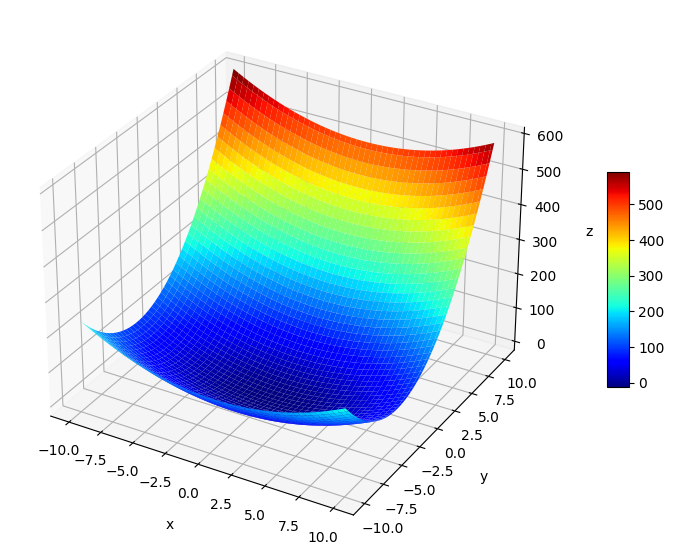

In [3]:
f = lambda x,y: x**2 - x + 3*y**2 + 18*y + 14

x = np.linspace(-10,10,100)
y = x.copy()

X,Y =np.meshgrid(x,y)
F = f(X,Y)

fig = plt.figure(figsize=(15,7))

ax=plt.subplot(projection='3d')
surf=ax.plot_surface(X,Y,F,cmap='jet')

#Side color bar: shrink=height, aspect=width
fig.colorbar(surf,shrink=0.4, aspect=10)

ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)

plt.show()

**Plotting the contour plot for the surface**

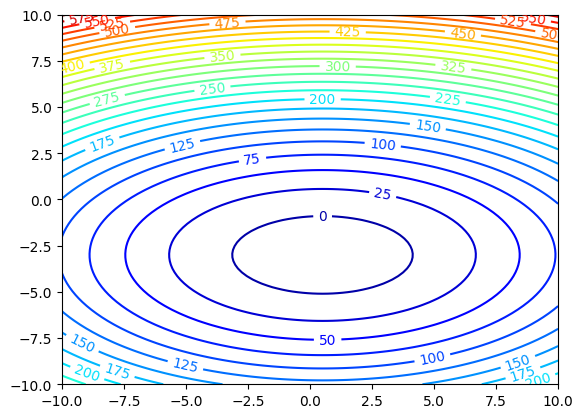

In [4]:
N = 25

cp = plt.contour(X,Y,F,N, cmap='jet')
plt.clabel(cp)

plt.show()

**Minimizing the function (without constraints)**

In [5]:
from scipy.optimize import minimize

f = lambda x: x[0]**2 - x[0] + 3*x[1]**2 + 18*x[1] + 14

x0=[1,0]
result = minimize(f,x0)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -13.249999999999993
        x: [ 5.000e-01 -3.000e+00]
      nit: 5
      jac: [ 0.000e+00 -4.768e-07]
 hess_inv: [[ 5.000e-01  3.801e-07]
            [ 3.801e-07  1.667e-01]]
     nfev: 21
     njev: 7

**Minimise the function 6x^2 + 3y^2 +4xy

subj to Constraints: xy=7**

In [6]:
f = lambda x: 6*x[0]**2 + 3*x[1]**2 +4*x[0]*x[1]
cons = ({'type': 'eq','fun': lambda x: x[0]*x[1]-7}) # All constraints are greater than type

bnds = ((0.5,1.51),(1.5,2.5)) 

X0 = (2,0)
res = minimize(f,X0, bounds=bnds, constraints= cons)
res2 = minimize(f, x0, constraints=None,method='nelder-mead')
res2

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 9.115032102306667e-09
             x: [-4.307e-05  4.109e-05]
           nit: 41
          nfev: 76
 final_simplex: (array([[-4.307e-05,  4.109e-05],
                       [ 4.826e-05, -4.432e-05],
                       [-3.199e-05,  9.757e-05]]), array([ 9.115e-09,  1.131e-08,  2.221e-08]))

**Plotting minimised objective function and constraint function**

Text(0.5, 0.92, 'Function Surface')

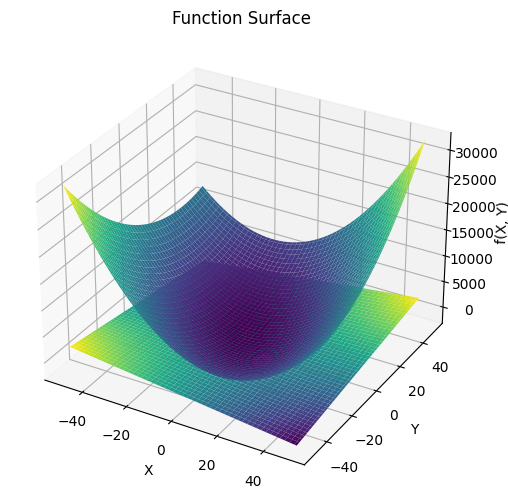

In [9]:
def f(x):
    # The objective function to minimize
    x, y = x
    return 6*x**2 + 3*y**2 +4*x*y

def g(x):
    # Constraint function (for example, x * y = 7)
    x, y = x
    return x * y - 7

# Bounds for x and y (example: -5 to 5 for both)
bounds = ((-5, 5), (-5, 5))
initial_guess = [0, 0] # Initial guess for x and y
result = minimize(f, initial_guess, method='SLSQP', constraints={'type': 'eq', 'fun': g}, bounds=bounds)
# Create meshgrid for x and y values
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the corresponding z values (f(x, y)) for the meshgrid
Z = f([X, Y])
W = g([X,Y])

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, W, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Function Surface')

**Plotting contour for the function**

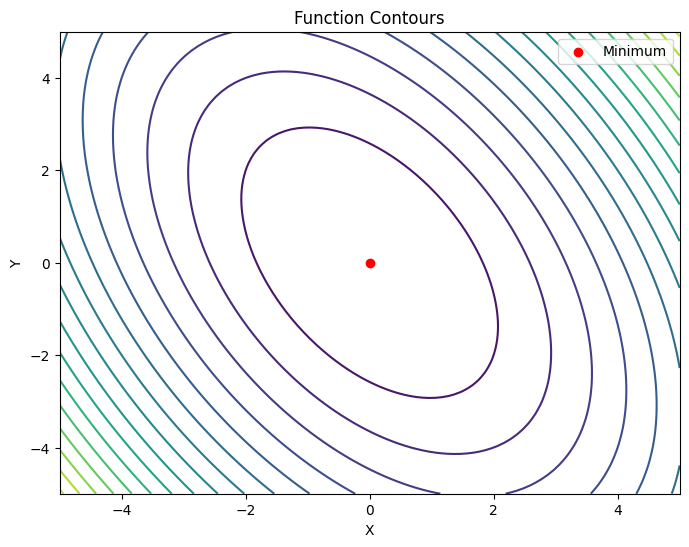

Minimum value: 0.0


In [8]:
# Plot the contours
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function Contours')

# Plot the minimum point found by the optimization
min_x, min_y = result.x
plt.scatter(min_x, min_y, color='red', label='Minimum')
plt.legend()

plt.show()
# Access the minimum value of the objective function
minimum_value = result.fun
print("Minimum value:", minimum_value)